# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f as f_dist
from sklearn.metrics import r2_score
from scipy.stats import f


In [ ]:
N = 11

columns = ["height", "mass", "income", "iq", "pages", 
            "age", "bmi", "work_exp", "friends", "test_time"]

col1_index = N % 5
col2_index = (N ** 2) % 5 + 5

col1 = columns[col1_index - 1] if col1_index != 0 else columns[4]
col2 = columns[col2_index - 1]

print("Выбраны столбцы:", col1, "и", col2)

Выбраны столбцы: height и age


In [26]:
df = pd.read_csv('../../datasets/students_simple.csv')

x = df[col1]
y = df[col2]

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [27]:
x_mean = np.mean(x)
y_mean = np.mean(y)
signs = np.sign((x - x_mean) * (y - y_mean))
r_fechner = np.sum(signs > 0) / len(signs) - np.sum(signs < 0) / len(signs)

print("Коэффициент Фехнера =", round(r_fechner, 4))

Коэффициент Фехнера = 0.1


In [28]:
r_pearson, p_pearson = stats.pearsonr(x, y)
n = len(x)
stderr = 1 / np.sqrt(n - 3)
delta = 1.96 * stderr
lower = np.tanh(np.arctanh(r_pearson) - delta)
upper = np.tanh(np.arctanh(r_pearson) + delta)

print(f"Коэффициент Пирсона = {r_pearson:.4f}")
print(f"95% доверительный интервал: [{lower:.4f}, {upper:.4f}]")

Коэффициент Пирсона = 0.1944
95% доверительный интервал: [-0.2715, 0.5865]


In [29]:
r_spearman, p_spearman = stats.spearmanr(x, y)
print(f"Коэффициент Спирмена = {r_spearman:.4f}")

Коэффициент Спирмена = 0.1750


In [30]:
r_kendall, p_kendall = stats.kendalltau(x, y)
print(f"Коэффициент Кенделла = {r_kendall:.4f}")

Коэффициент Кенделла = 0.1223


## Анализ корреляций выбранных столбцов

###  Коэффициент Фехнера = 0.1

* Показывает, как часто отклонения двух переменных совпадают по направлению.
* Значение 0.1 → очень слабая положительная связь.

**Вывод:** почти нет закономерности между выбранными столбцами.

---

### Коэффициент Пирсона = 0.1944

* Измеряет **линейную зависимость** между переменными.
* Значение 0.1944 → очень слабая прямая зависимость.
* 95% доверительный интервал: [-0.2715, 0.5865] → включает 0, значит статистически связь **не значима**.

**Вывод:** линейной связи практически нет.

---

### Коэффициент Спирмена = 0.1750

* Измеряет **ранговую (монотонную) зависимость**.
* Значение 0.175 → слабая положительная зависимость.

**Вывод:** увеличение одного столбца едва сопровождается увеличением второго.

---

### Коэффициент Кенделла = 0.1223

* Показывает согласованность парных изменений.
* Значение 0.122 → очень слабая положительная связь.

**Вывод:** изменения одного столбца почти не связаны с изменениями другого.

---

### Общий вывод

* Все коэффициенты показывают **очень слабую положительную зависимость** между выбранными столбцами.
* Никакая статистически значимая связь не выявлена (Пирсон доверительный интервал включает 0).
* Практически это значит, что **из одного столбца нельзя предсказать значения другого** — данные почти независимы.


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

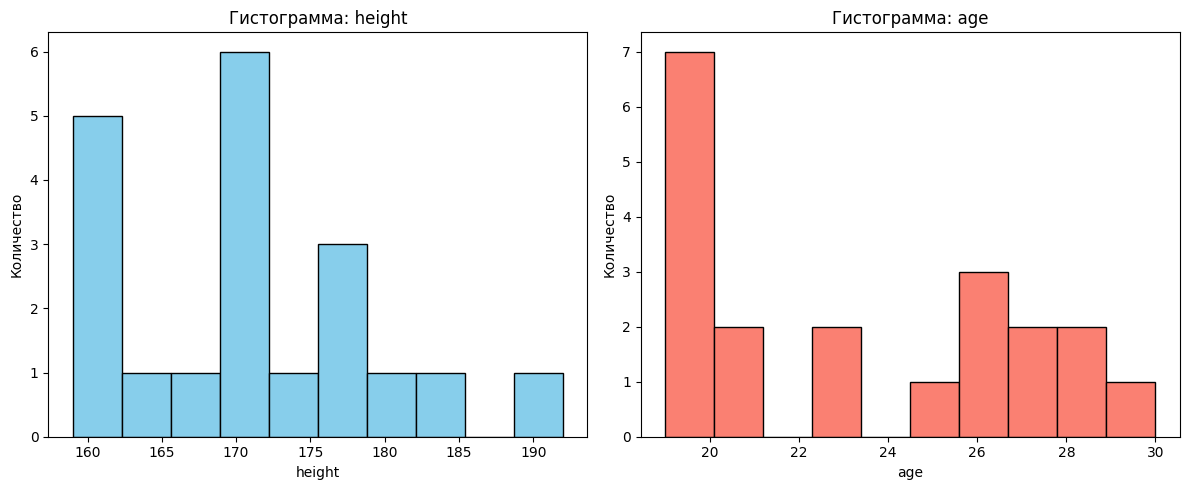

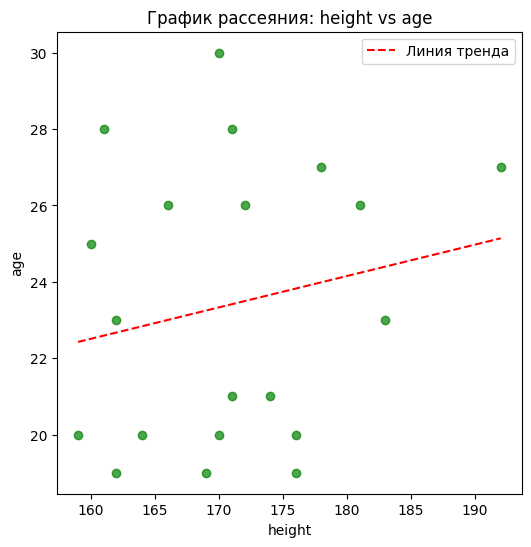

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(x, bins=10, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма: {col1}')
plt.xlabel(col1)
plt.ylabel('Количество')

plt.subplot(1,2,2)
plt.hist(y, bins=10, color='salmon', edgecolor='black')
plt.title(f'Гистограмма: {col2}')
plt.xlabel(col2)
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

##График рассеяния (scatter plot)
plt.figure(figsize=(6,6))
plt.scatter(x, y, color='green', alpha=0.7)
plt.title(f'График рассеяния: {col1} vs {col2}')
plt.xlabel(col1)
plt.ylabel(col2)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--', label='Линия тренда')
plt.legend()
plt.show()



# Гистограммы 

## Гистограмма: height
Большинство студентов имеют рост около 170 см, есть несколько выше 180 см и один почти 192 см.
Распределение слегка скошено в сторону больших значений.
Вывод: рост студентов варьируется, но чаще всего встречается около среднего значения.

## Гистограмма: age
Основная часть студентов в возрасте 19–20 лет, есть отдельные значения 25–30 лет.
Распределение смещено в сторону младших возрастов.
Вывод: большинство студентов — молодые (19–20 лет), есть несколько старших, что создаёт небольшую вариативность.

# График рассеяния
Что видно: точки сильно рассыпаны, линия тренда немного поднимается.
Интерпретация: при увеличении роста (height) есть очень слабая тенденция к увеличению возраста (age), но она почти незаметна.
Вывод: связь между ростом и возрастом слабая. Практически невозможно предсказать возраст по росту или наоборот.

# Общий вывод по визуализации
- Рост (height) и возраст (age) имеют слабую положительную связь, что согласуется с рассчитанными ранее коэффициентами корреляции.
- Распределение обоих признаков показывает небольшое разнообразие данных, с несколькими выбросами (очень высокий рост, старший возраст).
- В целом данные не имеют сильной закономерности, зависимости между ростом и возрастом практически нет.

## 3. Уравнение регрессии
Построить уравнение регрессии методом наименьших квадратов по видам:
1. линейная, $y=w_1 x + w_0$ - расчёт коэффициентов реализовать саммому
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

Линейная регрессия: y = 0.08*x + 9.35, R² = 0.0378


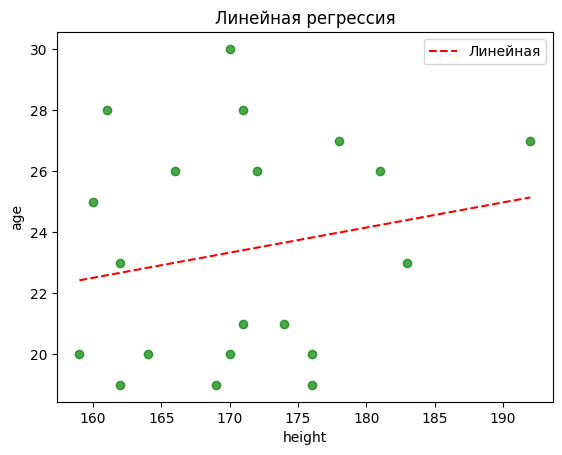

In [32]:
# Линейная регрессия
x_plot = np.linspace(min(x), max(x), 100)

x_mean = np.mean(x)
y_mean = np.mean(y)

w1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
w0 = y_mean - w1*x_mean

y_pred_lin = w1*x + w0
r2_lin = r2_score(y, y_pred_lin)
print(f'Линейная регрессия: y = {w1:.2f}*x + {w0:.2f}, R² = {r2_lin:.4f}')

plt.scatter(x, y, color='green', alpha=0.7)
plt.plot(x_plot, w1*x_plot + w0, color='red', linestyle='--', label='Линейная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Линейная регрессия')
plt.legend()
plt.show()

Квадратичная регрессия: y = 0.0053*x^2 + -1.77*x + 169.69, R² = 0.0559


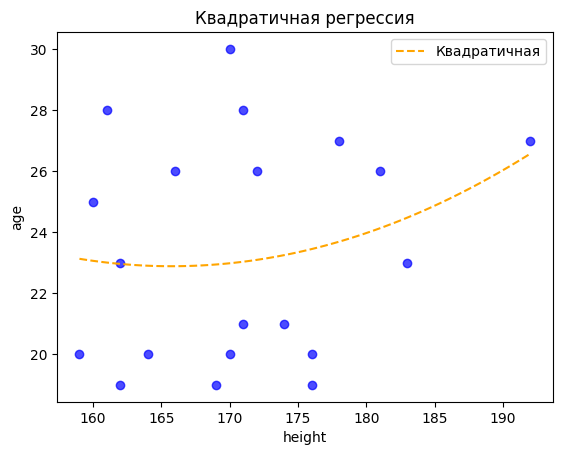

In [33]:
# Квадратичная регрессия
w2, w1_quad, w0_quad = np.polyfit(x, y, 2)
y_pred_quad = w2*x**2 + w1_quad*x + w0_quad
r2_quad = r2_score(y, y_pred_quad)
print(f'Квадратичная регрессия: y = {w2:.4f}*x^2 + {w1_quad:.2f}*x + {w0_quad:.2f}, R² = {r2_quad:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_quad = w2*x_plot**2 + w1_quad*x_plot + w0_quad

plt.scatter(x, y, color='blue', alpha=0.7)
plt.plot(x_plot, y_plot_quad, color='orange', linestyle='--', label='Квадратичная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Квадратичная регрессия')
plt.legend()
plt.show()



Гиперболическая регрессия: y = -2351.71/x + 37.20, R² = -12903614693.4061


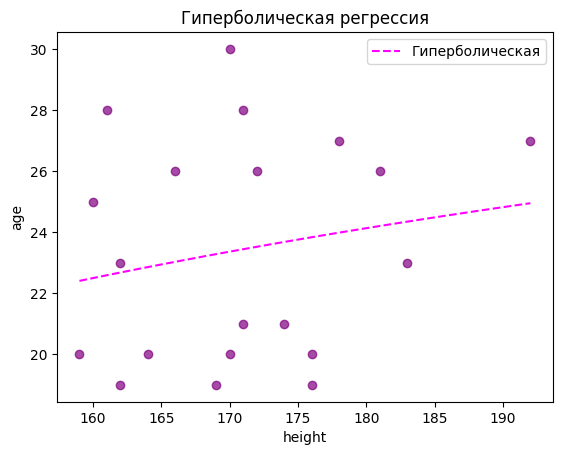

In [34]:
# Гиперболическая регрессия (y = w1/x + w0)
X_inv = 1/x  
w1_hyp = np.sum((X_inv - np.mean(X_inv))*(y - np.mean(y))) / np.sum((X_inv - np.mean(X_inv))**2)
w0_hyp = np.mean(y) - w1_hyp*np.mean(X_inv)

y_pred_hyp = w1_hyp/X_inv + w0_hyp
r2_hyp = r2_score(y, w1_hyp/X_inv + w0_hyp)
print(f'Гиперболическая регрессия: y = {w1_hyp:.2f}/x + {w0_hyp:.2f}, R² = {r2_hyp:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_hyp = w1_hyp/x_plot + w0_hyp

plt.scatter(x, y, color='purple', alpha=0.7)
plt.plot(x_plot, y_plot_hyp, color='magenta', linestyle='--', label='Гиперболическая')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Гиперболическая регрессия')
plt.legend()
plt.show()

Показательная регрессия: y = 12.48 * 1.00^x, R² = 0.0336


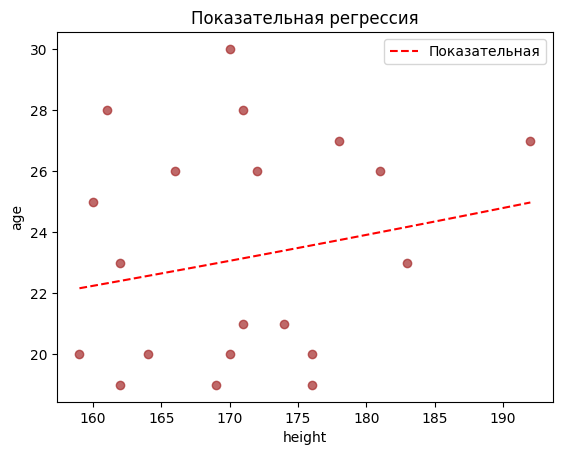

In [35]:
# Показательная регрессия (y = w0 * w1^x)
Y_log = np.log(y)  # логарифмируем y
w1_log = np.sum((x - np.mean(x))*(Y_log - np.mean(Y_log))) / np.sum((x - np.mean(x))**2)
w0_log = np.mean(Y_log) - w1_log*np.mean(x)

w0_exp = np.exp(w0_log)
w1_exp = np.exp(w1_log)

y_pred_exp = w0_exp * w1_exp**x
r2_exp = r2_score(y, y_pred_exp)
print(f'Показательная регрессия: y = {w0_exp:.2f} * {w1_exp:.2f}^x, R² = {r2_exp:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_exp = w0_exp * w1_exp**x_plot

plt.scatter(x, y, color='brown', alpha=0.7)
plt.plot(x_plot, y_plot_exp, color='red', linestyle='--', label='Показательная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Показательная регрессия')
plt.legend()
plt.show()


## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

In [41]:
w2, w1, w0 = np.polyfit(x, y, 2)
y_pred_quad = w2*x**2 + w1*x + w0
R2_quad = 1 - np.sum((y - y_pred_quad)**2)/np.sum((y - np.mean(y))**2)
k_quad = 2  # число факторов

F_quad = (R2_quad / k_quad) / ((1 - R2_quad) / (n - k_quad - 1))
alpha = 0.05
F_crit_quad = f.ppf(1 - alpha, k_quad, n - k_quad - 1)

print("Квадратичная модель (наилучшая):")
print(f"R² = {R2_quad:.4f}, F = {F_quad:.4f}, F_крит = {F_crit_quad:.4f}")
if F_quad > F_crit_quad:
    print("Модель значима статистически")
else:
    print("Модель не значима статистически")

# -----------------------------
# Гиперболическая модель (наихудшая)
# y = a/x + b -> преобразуем: z = 1/x, y = a*z + b
z = 1 / x
A = np.vstack([z, np.ones_like(z)]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
y_pred_hyp = a*z + b
R2_hyp = 1 - np.sum((y - y_pred_hyp)**2)/np.sum((y - np.mean(y))**2)
k_hyp = 1

F_hyp = (R2_hyp / k_hyp) / ((1 - R2_hyp) / (n - k_hyp - 1))
F_crit_hyp = f.ppf(1 - alpha, k_hyp, n - k_hyp - 1)

print("\nГиперболическая модель (наихудшая):")
print(f"R² = {R2_hyp:.4f}, F = {F_hyp:.4f}, F_крит = {F_crit_hyp:.4f}")
if F_hyp > F_crit_hyp:
    print("Модель значима статистически")
else:
    print("Модель не значима статистически")

Квадратичная модель (наилучшая):
R² = 0.0559, F = 0.5033, F_крит = 3.5915
Модель не значима статистически

Гиперболическая модель (наихудшая):
R² = 0.0347, F = 0.6467, F_крит = 4.4139
Модель не значима статистически


### Вывод по проверке регрессий с помощью критерия Фишера

1. **Квадратичная модель (наилучшая)**

   * (R² = 0.0559) — модель объясняет всего 5,6% вариации зависимой переменной.
   * (F = 0.5033 < F_{крит} = 3.5915) — модель **не значима статистически**.
     **Вывод:** квадратичная зависимость формально лучше других моделей, но практически не описывает данные и не имеет статистического подтверждения.

2. **Гиперболическая модель (наихудшая)**

   * (R² = 0.0347) — модель объясняет лишь 3,5% вариации.
   * (F = 0.6467 < F_{крит} = 4.4139) — модель также **не значима статистически**.
     **Вывод:** гиперболическая модель плохо описывает данные и не пригодна для практического применения.

**Общий вывод:**
Ни одна из рассматриваемых моделей не соответствует данным на статистически значимом уровне. Для построения адекватной регрессии необходимо рассмотреть другие типы функций, дополнительные факторы или преобразование данных.
